# Programming Exercise 1 - Linear Regression

In [48]:
# python 2 and 3 compatiable
from __future__ import print_function, division, absolute_import, unicode_literals
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

--------------------------

## warmUpExercise

__`warmUpExercise Function`__

In [6]:
def warmUpExercise():
    return(np.identity(5))

In [7]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

-------------------
-------------------

## Linear regression with one variable

__1. Plotting the Data__

In [9]:
# read comma separated text data
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

Text(0.5,1,'Scatter plot of training data')

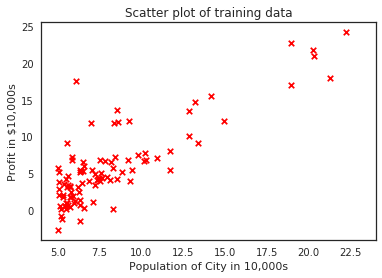

In [23]:
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

-------------------

__2. Cost and Gradient descent __

__`Cost Function`__

In [18]:
def computeCost(X, y, theta=[[0], [0]]):
    m = y.size                                        # number of training examples
    J = 0                                             # initialization

    h = X.dot(theta)                                  # prediction/Hypothesis

    J = 1/(2*m)*np.sum(np.square(h-y))

    return J

In [19]:
computeCost(X,y)

32.072733877455676

__`Gradient descent Function`__

GRADIENTDESCENT Performs gradient descent to learn theta

In [32]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))      #alpha - learning rate 
        J_history[iter] = computeCost(X, y, theta)      #Save the cost J in every iteration    
    return(theta, J_history)    

`Theta` found by gradient descent :-

theta:  [-3.63029144  1.16636235]

 Visualizing Cost-J(θ) wrt number of Iterations(pass/epoches)


Text(0.5,1,'Cost vs Iteration curve')

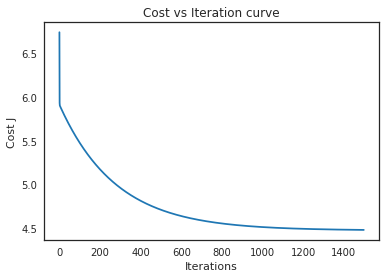

In [42]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())            #Theta found by gradient descent

print('\n','Visualizing Cost-J(θ) wrt number of Iterations(pass/epoches)')
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.title('Cost vs Iteration curve')

__3. `Plotting` :- Training data with linear regression fit__

Text(0.5,1,'Training data with linear regression fit')

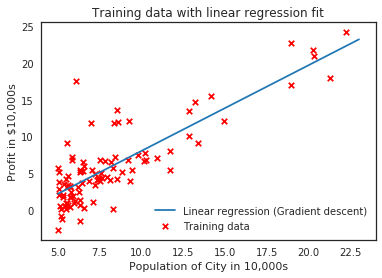

In [47]:
xx = np.arange(5, 24)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1, label='Training data')
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.title('Training data with linear regression fit')

__4. `predictions on profits`__

In [39]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


__5. `Visualizing J(θ)`:__

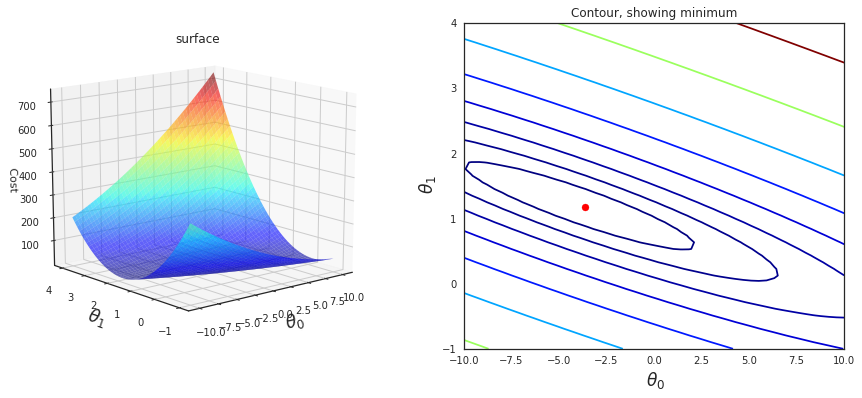

In [64]:
# Grid over which we will calculate J

# np.linapace(): Return evenly spaced numbers over a specified interval.
B0 = np.linspace(-10, 10, 50, endpoint=True, retstep=False, dtype=None)
B1 = np.linspace(-1, 4, 50)

# np.meshgrig(): Return co-ordinate matrices from coordinate vectors-nD.
xx, yy = np.meshgrid(B0, B1, indexing='xy')

# np.zeros(): initialize J_vals to a matrix of 0's
J_vals = np.zeros((B0.size, B1.size))

# Calculate Jvals(Cost) based on grid of coefficients
# Multidimensional index iterator, Return an iterator yielding pairs of coordinates and values.
for (i, j), v in np.ndenumerate(J_vals):
    J_vals[i, j] = computeCost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d', title='surface')
ax2 = fig.add_subplot(122, title='Contour, showing minimum')
 
# Surface plot
ax1.plot_surface(xx, yy, J_vals, rstride=1, cstride=1,
                 alpha=0.6, cmap=plt.cm.jet)
ax1.set_zlabel(' Cost')
ax1.set_zlim(J_vals.min(), J_vals.max())
ax1.view_init(elev=15, azim=230)

# Conture plot:
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
CS = ax2.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.scatter(theta[0], theta[1], c='r')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r' $\theta_0$ ', fontsize=17)

    ax.set_ylabel(r' $\theta_1$ ', fontsize=17)

------------------
------------------

# Optional Exercises

__`Linear regression with multiple variables`__

As we know cost function and Gradient-Descent function same for multi-Linear Regression
Only we have to calculate Feature normalization and Normal Equation

**1. Feature Normalization**

FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each feature is 0 and the standard  

deviation is 1. This is often a good preprocessing step to do when working with learning algorithms.

`featureNormalize Function`

Comming soon!    